In [101]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

In [102]:
num_data = 1000
num_epoch = 10000


x = init.uniform_(torch.FloatTensor(num_data,1), -15, 15)
noise = init.normal_(torch.FloatTensor(num_data,1),std =3)


Y1 = x**4 + x**2
Y2 = x**2 + x

Y1_noise = (x+noise)**4 + (x+noise)**2
Y2_noise = (x+noise)**2 + (x+noise)

--Y1--

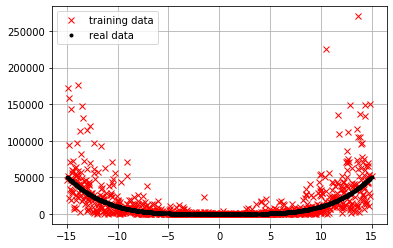

In [130]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x.data, Y1_noise.data, 'rx')
plt.plot(x.data, Y1.data, 'k.')
plt.legend(['training data', 'real data'])
plt.grid(True)
plt.show()

In [104]:
model_1 = nn.Sequential(
    nn.Linear(1,3),
    nn.ReLU(),
	nn.Linear(3,5),
	nn.ReLU(),
	nn.Linear(5,8),
	nn.ReLU(),
	nn.Linear(8,8),
	nn.ReLU(),
	nn.Linear(8,8),
	nn.ReLU(),
	nn.Linear(8,1),
)

In [105]:
loss_func = nn.MSELoss()
optimizer = optim.Adam(model_1.parameters(),lr=0.005)

In [128]:
loss_array_1 = []
for i in range(num_epoch):
    optimizer.zero_grad()
    output = model_1(x)
    loss = loss_func(output,Y1_noise)
    loss.backward()
    optimizer.step()
    loss_array_1.append(loss.data)

<function matplotlib.pyplot.show(*args, **kw)>

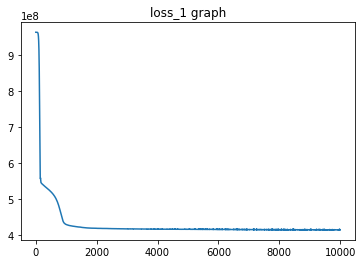

In [107]:
plt.plot(loss_array_1)
plt.title('loss_1 graph')
plt.show

In [132]:
num_data = 1000
x_test = init.uniform_(torch.Tensor(num_data, 1), -15, 15)
y_test = model_1(x_test)

<function matplotlib.pyplot.show(*args, **kw)>

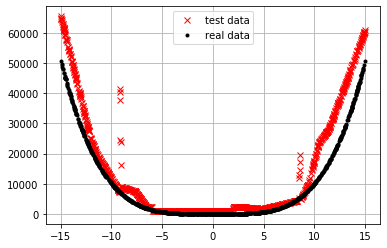

In [133]:
plt.plot(x_test.data, y_test.data, 'rx')
plt.plot(x.data,Y1.data, 'k.')
plt.legend(['test data','real data'])
plt.grid(True)
plt.show

--Y2--

<function matplotlib.pyplot.show(*args, **kw)>

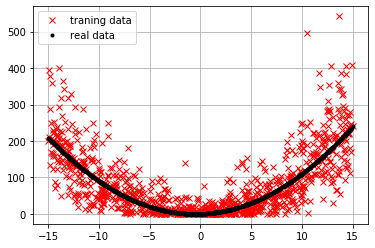

In [134]:
plt.plot(x.data, Y2_noise.data, 'rx')
plt.plot(x.data, Y2.data, 'k.')
plt.legend(['traning data','real data'])
plt.grid(True)
plt.show

In [135]:
model_2 = nn.Sequential(
    nn.Linear(1,3),
    nn.ReLU(),
	nn.Linear(3,5),
	nn.ReLU(),
	nn.Linear(5,8),
	nn.ReLU(),
	nn.Linear(8,8),
	nn.ReLU(),
	nn.Linear(8,8),
	nn.ReLU(),
	nn.Linear(8,1),
)

In [136]:
loss_func = nn.MSELoss()
optimizer = optim.Adam(model_2.parameters(),lr=0.005)

In [137]:
loss_array_2 = []
for i in range(num_epoch):
    optimizer.zero_grad()
    output = model_2(x)
    loss = loss_func(output,Y2_noise)
    loss.backward()
    optimizer.step()    
    loss_array_2.append(loss.data)

<function matplotlib.pyplot.show(*args, **kw)>

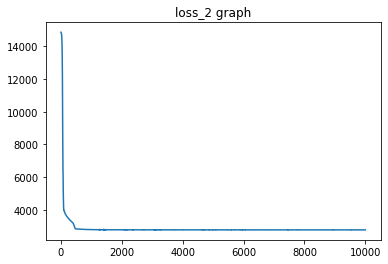

In [138]:
plt.plot(loss_array_2)
plt.title('loss_2 graph')
plt.show

In [139]:
num_data = 1000
x_test = init.uniform_(torch.Tensor(num_data, 1), -15, 15)
y_test = model_2(x_test)

<function matplotlib.pyplot.show(*args, **kw)>

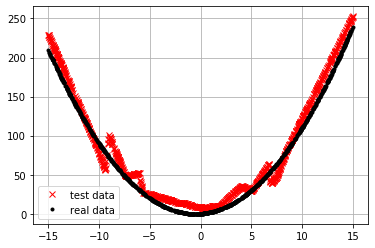

In [140]:
plt.plot(x_test.data, y_test.data, 'rx')
plt.plot(x.data,Y2.data, 'k.')
plt.legend(['test data','real data'])
plt.grid(True)
plt.show